# 15 머신러닝을 이용한 예측 분석

## 15-1. 머신러닝 모델 알아보기

## 15-2 소득 예측 모델 만들기

In [1]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 전처리

#### 1. 타겟 변수 전처리

In [2]:
df['income'].value_counts(normalize = True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [3]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

low     0.760718
high    0.239282
Name: income, dtype: float64

#### 2. 불필요한 변수 제거하기

In [4]:
df = df.drop(columns = 'fnlwgt')

#### 3. 문자 타입 변수를 숫자 타입으로 바꾸기

**원핫 인코딩하기**

In [5]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [6]:
df_tmp['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [7]:
# df_tmp의 문자 타입 변수에 원핫 인코딩 적용
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [8]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [9]:
target = df['income']             # income 추출

df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 문자 타입 변수 원핫 인코딩

df['income'] = target             # df에 target 삽입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [ ]:
import numpy as np
# df.info(max_cols = np.inf)

#### 4. 데이터 분할하기

#### adult 데이터 분할하기

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정

In [12]:
# train
df_train.shape

(34189, 108)

In [13]:
# test
df_test.shape

(14653, 108)

In [14]:
# train
df_train['income'].value_counts(normalize = True)

low     0.760713
high    0.239287
Name: income, dtype: float64

In [15]:
# test
df_test['income'].value_counts(normalize = True)

low     0.760732
high    0.239268
Name: income, dtype: float64

### 의사결정나무 모델 만들기

#### 모델 설정하기

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

#### 모델 만들기

In [17]:
train_x = df_train.drop(columns = 'income')  # 예측 변수 추출
train_y = df_train['income']                 # 타겟 변수 추출

model = clf.fit(X = train_x, y = train_y)    # 모델 만들기

### 모델 구조 살펴보기

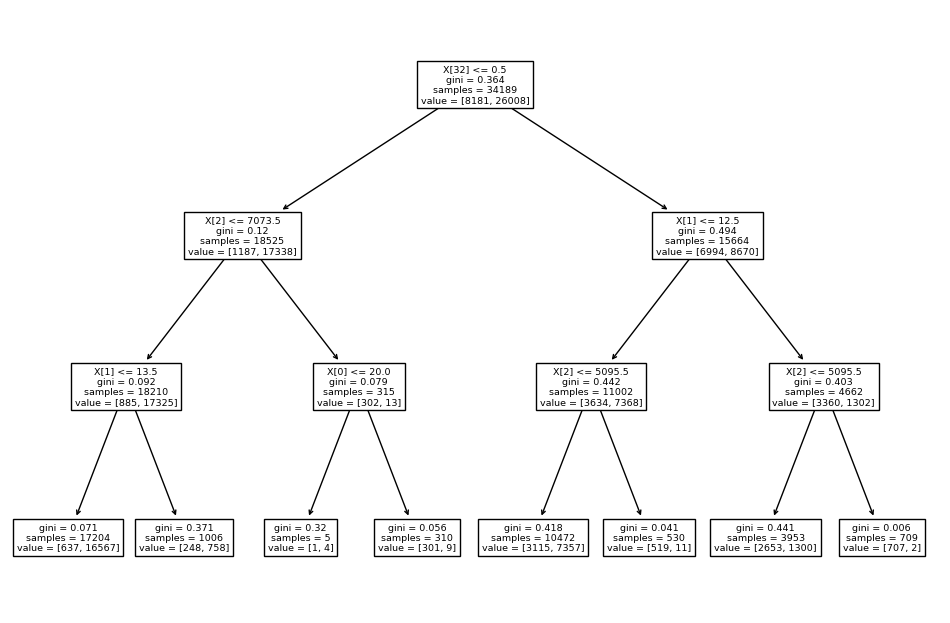

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [12, 8],  # 그래프 크기 설정
                     'figure.dpi'     : '100'})   # 해상도 설정
                     
tree.plot_tree(model);                            # 그래프 출력

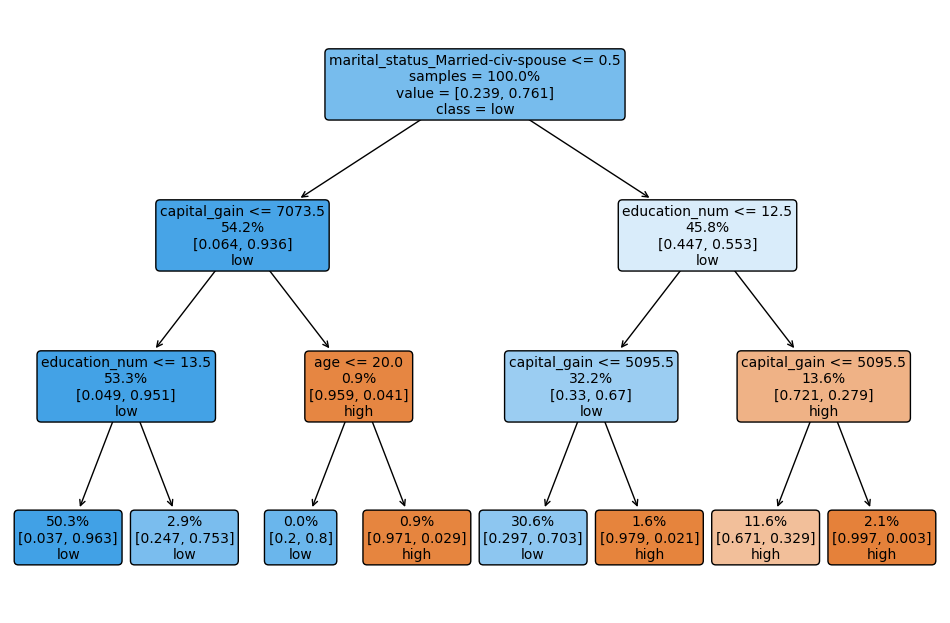

In [20]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = ["high", "low"],    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);                   # 글자 크기

### 모델을 이용해 예측하기

In [21]:
test_x = df_test.drop(columns = 'income')  # 예측 변수 추출
test_y = df_test['income']                 # 타겟 변수 추출

In [22]:
# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
48445,35,13,10520,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,high
19639,41,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,low
21606,29,4,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low


### 성능 평가하기

#### confusion matrix 만들기

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]], dtype=int64)

In [26]:
plt.rcParams.update(plt.rcParamsDefault)        # 그래프 설정 되돌리기

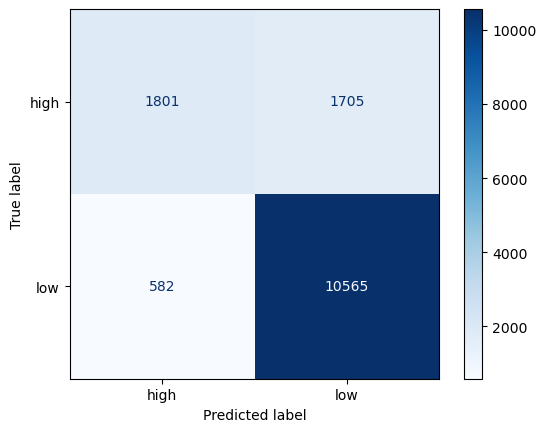

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명
p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력


#### 성능 평가 지표 구하기

**accuracy**

In [28]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],  # 실제값
                       y_pred = df_test['pred'])    # 예측값

0.8439227461953184

**precision**

In [29]:
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

0.7557700377675199

**recall**

In [30]:
metrics.recall_score(y_true = df_test['income'],  # 실제값
                     y_pred = df_test['pred'],    # 예측값
                     pos_label = 'high')          # 관심 클래스


0.5136908157444381

**F1 score**

In [31]:
metrics.f1_score(y_true = df_test['income'],  # 실제값
                 y_pred = df_test['pred'],    # 예측값
                 pos_label = 'high')          # 관심 클래스

0.6116488368143997

### 정리하기

In [ ]:
## 1. 전처리

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('adult.csv')

# 1. 타겟 변수 전처리
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')

# 2. 불필요한 변수 제거하기
df = df.drop(columns = 'fnlwgt')

# 3. 문자 타입 변수를 숫자 타입으로 바꾸기
target = df['income']             # income 추출
df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 원핫 인코딩으로 변환
df['income'] = target             # df에 target 삽입

# 4. 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정

## 2. 의사결정나무 모델 만들기

# 모델 설정하기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

# 모델 만들기
train_x = df_train.drop(columns = 'income')             # 예측 변수 추출
train_y = df_train['income']                            # 타겟 변수 추출
model = clf.fit(X = train_x, y = train_y)               # 모델 만들기

# 모델 구조 살펴보기
import matplotlib.pyplot as plt
tree.plot_tree(model,
               feature_names = train_x.columns,    # 예측 변수명
               class_names = ["high", "low"],      # 타겟 변수 클래스, 알파벳순
               proportion = True,                  # 비율 표기
               filled = True,                      # 색칠
               rounded = True,                     # 둥근 테두리
               impurity = False,                   # 불순도 표시
               label = 'root',                     # label 표시 위치
               fontsize = 12)                      # 글자 크기

## 3. 모델을 이용해 예측하기

# 예측하기
test_x = df_test.drop(columns = 'income')    # 예측 변수 추출
test_y = df_test['income']                   # 타겟 변수 추출
df_test['pred'] = model.predict(test_x)      # 예측값 구하기

## 4. 성능 평가하기

# confusion matrix 만들기
from sklearn import metrics
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서

# confusion matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명
p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

# accuracy
metrics.accuracy_score(y_true = df_test['income'],   # 실제값
                       y_pred = df_test['pred'])     # 예측값

# precision
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

# recall
metrics.recall_score(y_true = df_test['income'],     # 실제값
                     y_pred = df_test['pred'],       # 예측값
                     pos_label = 'high')             # 관심 클래스

# F1 score
metrics.f1_score(y_true = df_test['income'],         # 실제값
                 y_pred = df_test['pred'],           # 예측값
                 pos_label = 'high')                 # 관심 클래스
